# Hotel Bookings EDA

By: Erike, Reyhan, Ano

## Context: 
Industri pariwisata merupakan salah satu industri yang paling terdampak oleh pandemi covid-19, khususnya industri perhotelan. Dengan adanya pembatasan berpergian, menurut riset yang dilakukan Mckinsey pada tahun 2020, tingkat pemesanan hotel berkurang sangat jauh sampai-sampai membuat para investor di industri tersebut sangat pesimis.

Untuk menghadapi hal tersebut, Hotel perlu mengefisienkan operasionalnya untuk meningkatkan revenue agar bisa 'Survive' dari pandemi ini. Maka dari itu, Kami akan melakukan Exploratory Data Analysis dengan database 'Hotel Booking Demand' untuk mencari apa yang bisa ditingkatkan dan diperbaiki dari sebuah operasional hotel.

## Business Problem:
- Menaikkan Revenue
- Menurunkan cancellation rate
- Meningkatkan occupancy


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [4]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## Business Questions

### Business Question 1:
Bagaimana durasi menginap di city hotel dan resort hotel?


In [6]:
#membuat kolom baru untuk total durasi menginap
df['staydur'] = df['stays_in_weekend_nights']+df['stays_in_week_nights']
df['staydur']

0         0
1         0
2         1
3         1
4         2
         ..
119385    7
119386    7
119387    7
119388    7
119389    9
Name: staydur, Length: 119390, dtype: int64

In [7]:
df['staydur'].describe()

count    119390.000000
mean          3.427900
std           2.557439
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          69.000000
Name: staydur, dtype: float64

In [8]:
#jumlah pelanggan yang durasi menginapnya diatas rata-rata di city hotel
df[(df['hotel']=='City Hotel') & (df['staydur']>=4)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,staydur
40061,City Hotel,1,88,2015,July,27,1,0,4,2,...,9.0,NaN,0,Transient,76.50,0,1,Canceled,2015-07-01,4
40062,City Hotel,1,65,2015,July,27,1,0,4,1,...,9.0,NaN,0,Transient,68.00,0,1,Canceled,2015-04-30,4
40063,City Hotel,1,92,2015,July,27,1,2,4,2,...,9.0,NaN,0,Transient,76.50,0,2,Canceled,2015-06-23,6
40067,City Hotel,1,63,2015,July,27,2,1,3,1,...,9.0,NaN,0,Transient,68.00,0,0,Canceled,2015-06-25,4
40068,City Hotel,1,62,2015,July,27,2,2,3,2,...,8.0,NaN,0,Transient,76.50,0,1,No-Show,2015-07-02,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,7
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,7


In [9]:
#jumlah pelanggan yang durasi menginapnya diatas rata-rata di resort hotel
df[(df['hotel']=='Resort Hotel') & (df['staydur']>=4)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,staydur
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,240.0,NaN,0,Transient,123.00,0,0,Canceled,2015-06-23,4
11,Resort Hotel,0,35,2015,July,27,1,0,4,2,...,240.0,NaN,0,Transient,145.00,0,0,Check-Out,2015-07-05,4
12,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,240.0,NaN,0,Transient,97.00,0,3,Check-Out,2015-07-05,4
13,Resort Hotel,0,18,2015,July,27,1,0,4,2,...,241.0,NaN,0,Transient,154.77,0,1,Check-Out,2015-07-05,4
14,Resort Hotel,0,37,2015,July,27,1,0,4,2,...,241.0,NaN,0,Transient,94.71,0,0,Check-Out,2015-07-05,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017,August,35,31,2,8,2,...,143.0,NaN,0,Transient,89.75,0,0,Check-Out,2017-09-10,10
40056,Resort Hotel,0,169,2017,August,35,30,2,9,2,...,250.0,NaN,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10,11
40057,Resort Hotel,0,204,2017,August,35,29,4,10,2,...,250.0,NaN,0,Transient,153.57,0,3,Check-Out,2017-09-12,14
40058,Resort Hotel,0,211,2017,August,35,31,4,10,2,...,40.0,NaN,0,Contract,112.80,0,1,Check-Out,2017-09-14,14


In [10]:
#banyak pelanggan yang durasi menginap diatas rata-rata di city hotel dan resort hotel
pd.crosstab(index=df['hotel'], columns=df['staydur']>=4)

staydur,False,True
hotel,,
City Hotel,56410,22920
Resort Hotel,20044,20016


Sehingga didapatkan:
- 22920 pelanggan City Hotel menginap lebih lama dari rata-rata dan sebanyak 56410 pelanggan City Hotel menginap 1-3 hari.
- 20016 pelanggan Resort Hotel menginap lebih lama dari rata-rata dan sebanyak 20044 pelanggan Resort Hotel menginap 1-3 hari

In [11]:
pd.crosstab(index=df['hotel'], columns=df['staydur']>3, normalize=True)*100

staydur,False,True
hotel,,
City Hotel,47.248513,19.197588
Resort Hotel,16.788676,16.765223


### Insight 1:
- 47% pelanggan menginap di City Hotel dengan durasi lebih sedikit dari rata-rata durasi menginap, hanya 1-3 hari
- Hanya 19% pelanggan di City Hotel dengan durasi lama/long stay
- Pelanggan yang menginap di Resort Hotel memiliki kecenderungan yang sama antara yang menginap dalam 1-3 hari dan lebih dari 4 hari/long stay

### Business Question 2:
Dari 2015-2017 bagaimana tren jumlah pengunjung yang menginap di City Hotel dan Resort Hotel?

In [12]:
df_city = df[(df['hotel']=='City Hotel') & (df['staydur']>0)]

In [13]:
df_resort = df[(df['hotel']=='Resort Hotel') & (df['staydur']>0)]

In [14]:
pd.crosstab(index = df_city['arrival_date_year'], columns=(df_city['reservation_status']=='Check-Out'))

reservation_status,False,True
arrival_date_year,,
2015,6004,7624
2016,15394,22553
2017,11681,15743


In [15]:
pd.crosstab(index = df_resort['arrival_date_year'], columns=(df_resort['reservation_status']=='Check-Out'))

reservation_status,False,True
arrival_date_year,,
2015,2137,6077
2016,4920,13423
2017,4053,9066


### Insight 2:
- Dalam data City Hotel pengunjung yang menginap hingga Check-Out pada tahun 2015 sebanyak 7624, tahun 2016 sebanyak 22553, tahun 2017 sebanyak 15743. Terdapat kenaikan di 2015-2016 sebanyak 14929 pengunjung atau sebanyak 195% tetapi mengalami penurunan di tahun 2017 yaitu sebanyak 7080 pengunjung atau 31% dari tahun sebelumnya.
- Dalam data Resort Hotel pengunjung yang menginap hingga Check-Out pada tahun 2015 sebanyak 6077, tahun 2016 sebanyak 13423, dan tahun 2017 sebanyak 9066. Terdapat kenaikan di 2015-2016 sebanyak 7346 pengunjung atau sebanyak 120% tetapi mengalami penurunan di tahun 2017 yaitu sebanyak 4357 pengunjung atau 32% dari tahun sebelumnya.

### Business Question 3:
Dari 2015-2017 bagaimana tren pengunjung yang menginap per bulannya di masing-masing hotel?

In [16]:
#Tabel berisi pengunjung per bulan di city hotel dan resort hotel di tahun 2015-2017
tabel = pd.crosstab(index=df['arrival_date_month'], columns=[df['hotel'],df['arrival_date_year']])
tabel

hotel              City Hotel             Resort Hotel            
arrival_date_year        2015  2016  2017         2015  2016  2017
arrival_date_month                                                
April                       0  3561  3919            0  1867  1742
August                   2480  3378  3125         1409  1685  1800
December                 1654  2478     0         1266  1382     0
February                    0  2371  2594            0  1520  1583
January                     0  1364  2372            0   884  1309
July                     1398  3131  3559         1378  1441  1754
June                        0  3923  3971            0  1369  1676
March                       0  3046  3412            0  1778  1558
May                         0  3676  4556            0  1802  1757
November                 1235  3122     0         1105  1332     0
October                  3386  4219     0         1571  1984     0
September                3529  3871     0         1585  1523     0

In [17]:
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
tabel1 = tabel.reindex(months, axis=0)
tabel1

hotel              City Hotel             Resort Hotel            
arrival_date_year        2015  2016  2017         2015  2016  2017
arrival_date_month                                                
January                     0  1364  2372            0   884  1309
February                    0  2371  2594            0  1520  1583
March                       0  3046  3412            0  1778  1558
April                       0  3561  3919            0  1867  1742
May                         0  3676  4556            0  1802  1757
June                        0  3923  3971            0  1369  1676
July                     1398  3131  3559         1378  1441  1754
August                   2480  3378  3125         1409  1685  1800
September                3529  3871     0         1585  1523     0
October                  3386  4219     0         1571  1984     0
November                 1235  3122     0         1105  1332     0
December                 1654  2478     0         1266  1382     0

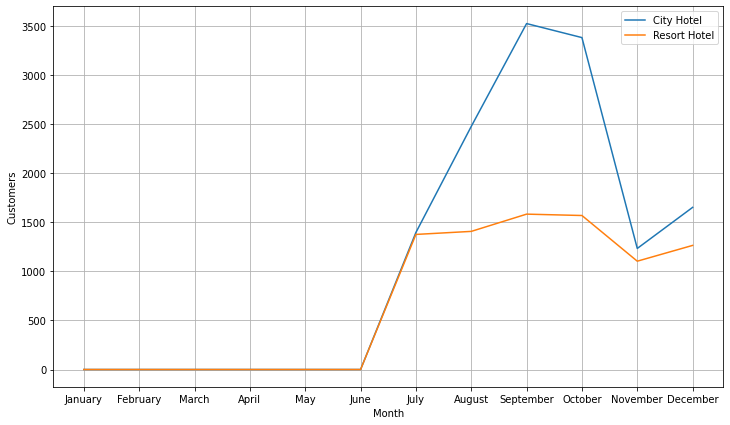

In [18]:
plt.figure(figsize=(12, 7))
plt.plot(tabel1['City Hotel'][2015])
plt.plot(tabel1['Resort Hotel'][2015])
plt.legend(['City Hotel','Resort Hotel'])
plt.xlabel('Month')
plt.ylabel('Customers')
plt.grid()
plt.savefig('2015.png')
plt.show()

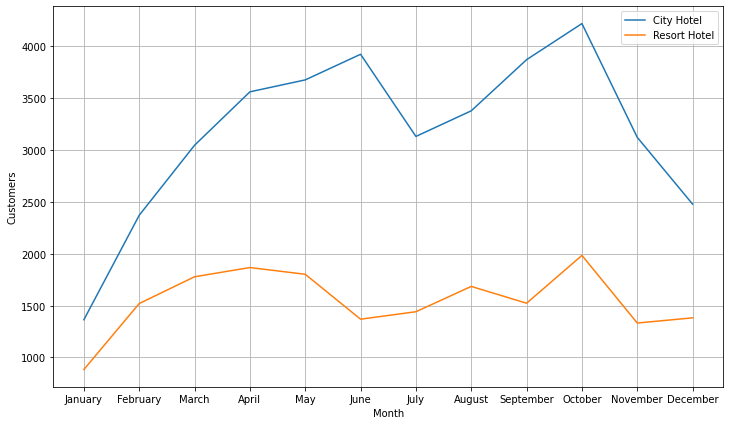

In [19]:
plt.figure(figsize=(12, 7))
plt.plot(tabel1['City Hotel'][2016])
plt.plot(tabel1['Resort Hotel'][2016])
plt.legend(['City Hotel','Resort Hotel'])
plt.xlabel('Month')
plt.ylabel('Customers')
plt.grid()
plt.savefig('2016.png')
plt.show()

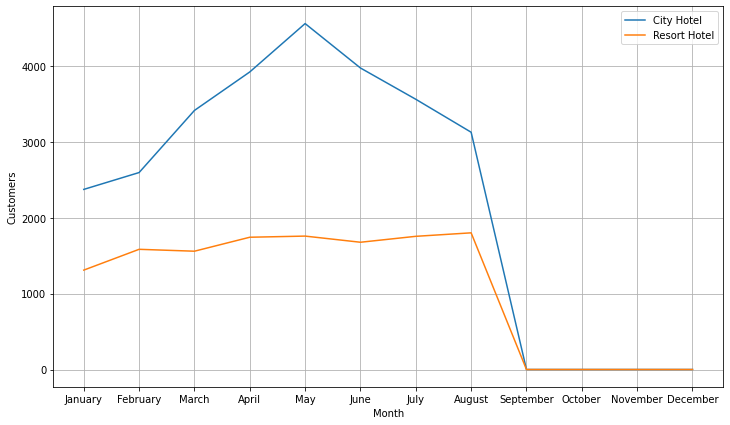

In [20]:
plt.figure(figsize=(12, 7))
plt.plot(tabel1['City Hotel'][2017])
plt.plot(tabel1['Resort Hotel'][2017])
plt.legend(['City Hotel','Resort Hotel'])
plt.xlabel('Month')
plt.ylabel('Customers')
plt.grid()
plt.savefig('2017.png')
plt.show()

### Insight 3:
- Tahun 2015 terdapat peningkatan pengunjung City Hotel antara bulan Juli-September dan mengalami penurunan di bulan November, sedangkan pengunjung Resort Hotel selama Juli-Desember tidak banyak mengalami fluktuasi
- Tahun 2016 terdapat peningkatan pengunjung City Hotel secara bertahap dari bulan Januari hingga Juni, walaupun terdapat penurunan di bulan Juli namun mengalami bounce back di bulan Agustus dan mencapai puncaknya di bulan Oktober, lalu mengalami penurunan sampai akhir tahun. Resort Hotel juga mengalami tren kenaikan dan penurunan yang tidak banyak selisihnya tiap bulan, mengalami puncak di bulan Oktober, namun nilainya hanya setengah dari City Hotel
- Tahun 2017 terdapat peningkatan pengunjung City Hotel antara bulan Januari-Mei dan mengalami penurunan Juni-Agustus, sedangkan Resort Hotel di saat yang sama mendapatkan pengunjung yang tidak banyak berubah jumlahnya tiap bulan

### Business Question 4:
Apakah Tipe deposit yang memiliki tingkat pembatalan paling tinggi?

In [21]:
(pd.crosstab(index=df['deposit_type'], columns=df['is_canceled'], normalize=True, margins=True, margins_name='Jumlah') * 100).round(2)

is_canceled,0,1,Jumlah
deposit_type,,,
No Deposit,62.77,24.87,87.65
Non Refund,0.08,12.14,12.22
Refundable,0.11,0.03,0.14
Jumlah,62.96,37.04,100.00


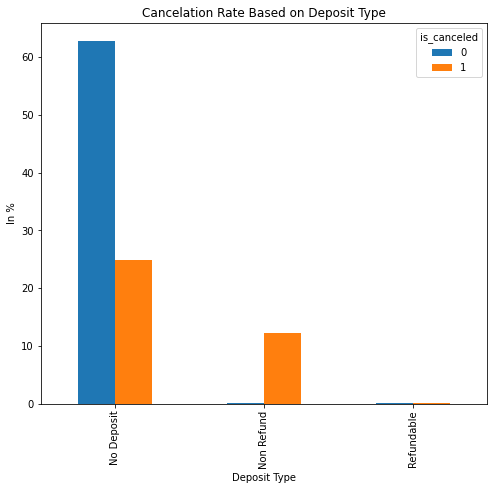

In [22]:
(pd.crosstab(index=df['deposit_type'], columns=df['is_canceled'], normalize=True) * 100).round(2).plot(kind='bar', figsize=(8, 7),
title = 'Cancelation Rate Based on Deposit Type',
xlabel = ('Deposit Type'), ylabel = 'In %')
# plt.savefig('depositchart.png')
plt.show()

### Insight 4:

1. Pemesanan dengan tipe deposit 'No Deposit' adalah tipe deposit yang paling banyak dengan presentase sebesar 87.65% dari total jumlah pesanan. 

2. Berdasarkan analisis bivariate diatas, dari total seluruh pesanan di hotel tersebut, pesanan yang tidak memberikan deposit, memiliki tingkat pembatalan tertinggi, sebesar 24.87%.

### Business Question 5:
Tipe hotel mana kah yang memiliki tingkat pembatalan pesanan tertinggi?

In [23]:
(pd.crosstab(df['hotel'], df['is_canceled'], normalize=True, margins=True, margins_name='Jumlah') * 100).round(2)

is_canceled,0,1,Jumlah
hotel,,,
City Hotel,38.72,27.73,66.45
Resort Hotel,24.24,9.32,33.55
Jumlah,62.96,37.04,100.00


### Insight 5:

1. Tipe hotel yang paling banyak dipesan adalah city hotel dengan presentase 66.45% dari seluruh pemesanan.

2. Dari hasil analisis bivariate diatas, dapat terlihat bahwa tingkat pembatalan di city hotel hampir 3x lipat dibanding Resort Hotel.

Untuk menganalisa lebih dalam, Mari kita masukkan variabel deposit type ke dalam analisis bivariate tersebut.

In [24]:
(pd.crosstab(index=[df['hotel'], df['deposit_type']], columns=df['is_canceled'], normalize=True, margins=True, margins_name='Jumlah') * 100).round(2)

is_canceled                    0      1  Jumlah
hotel        deposit_type                      
City Hotel   No Deposit    38.70  16.96   55.65
             Non Refund     0.02  10.76   10.78
             Refundable     0.01   0.01    0.02
Resort Hotel No Deposit    24.08   7.92   32.00
             Non Refund     0.06   1.38    1.44
             Refundable     0.10   0.02    0.12
Jumlah                     62.96  37.04  100.00

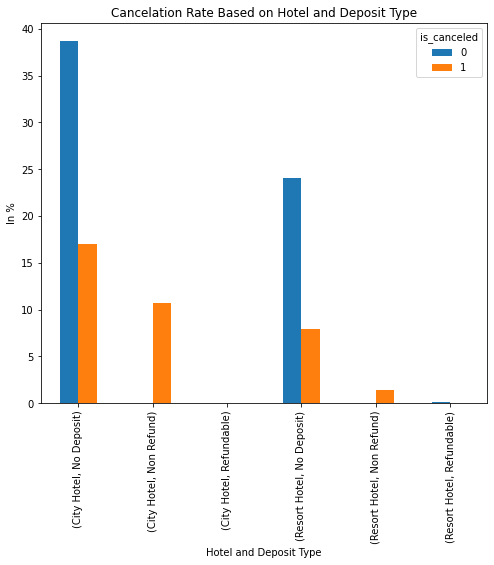

In [25]:
(pd.crosstab(index=[df['hotel'], df['deposit_type']], columns=df['is_canceled'], normalize=True) * 100).round(2).plot(kind='bar', figsize=(8, 7), title = 'Cancelation Rate Based on Hotel and Deposit Type',
xlabel = ('Hotel and Deposit Type'), ylabel = 'In %')
# plt.savefig('hoteldepositchart.png')
plt.show()

### Insight 5:

3. Dari analisis multivariate diatas, dapat terlihat bahwa tingkat pembatalan tertinggi berasal dari Hotel yang bertipe City Hotel dengan tanpa deposit.

### Business Question 6:
Market Segment mana yang memiliki tingkat pembatalan tertinggi?

In [26]:
(pd.crosstab(df['market_segment'], df['is_canceled'], normalize=True, margins=True, margins_name='Jumlah') * 100).round(2)

is_canceled,0,1,Jumlah
market_segment,,,
Aviation,0.15,0.04,0.20
Complementary,0.54,0.08,0.62
Corporate,3.60,0.83,4.44
Direct,8.94,1.62,10.56
Groups,6.46,10.13,16.59
Offline TA/TO,13.32,6.96,20.29
Online TA,29.93,17.37,47.30
Undefined,0.00,0.00,0.00
Jumlah,62.96,37.04,100.00


### Insight 6:
1. Pemesanan hotel terbanyak melalui Online Travel Agent sebesar 47.3% dari total seluruh pemesanan

2. Dari hasil analisis bivariate diatas, dapat terlihat bahwa tingkat pembatalan tertinggi berasal dari Online TA sebesar 17.37%.

Untuk menganalisis lebih lanjut, mari kita masukan variabel tipe deposit kedalam analisis bivariate diatas.

In [27]:
(pd.crosstab(index=[df['market_segment'], df['deposit_type']], columns=df['is_canceled'], normalize=True, margins=True, margins_name='Jumlah') * 100).round(2).sort_values(1, ascending=False)

is_canceled                      0      1  Jumlah
market_segment deposit_type                      
Jumlah                       62.96  37.04  100.00
Online TA      No Deposit    29.93  17.31   47.24
Groups         Non Refund     0.05   7.63    7.68
Offline TA/TO  Non Refund     0.00   4.19    4.19
               No Deposit    13.32   2.77   16.09
Groups         No Deposit     6.31   2.49    8.80
Direct         No Deposit     8.93   1.60   10.54
Corporate      No Deposit     3.58   0.57    4.15
               Non Refund     0.02   0.26    0.28
Complementary  No Deposit     0.54   0.08    0.62
Online TA      Non Refund     0.00   0.04    0.05
Aviation       No Deposit     0.15   0.04    0.20
Online TA      Refundable     0.00   0.02    0.02
Direct         Non Refund     0.00   0.01    0.02
Groups         Refundable     0.10   0.01    0.11
Corporate      Refundable     0.00   0.00    0.00
Direct         Refundable     0.00   0.00    0.01
Offline TA/TO  Refundable     0.00   0.00    0.00
Undefined      No Deposit     0.00   0.00    0.00

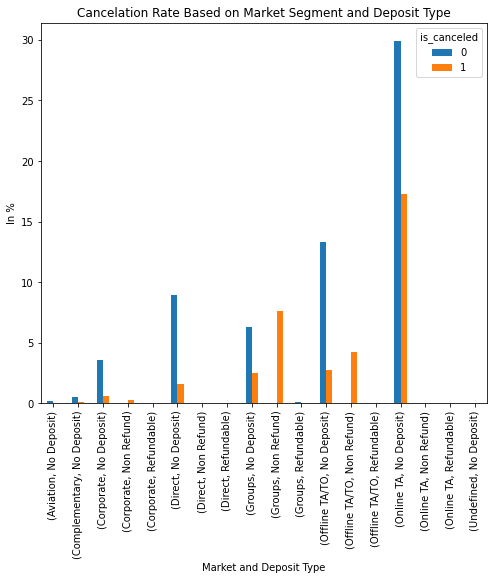

In [28]:
(pd.crosstab(index=[df['market_segment'], df['deposit_type']], columns=df['is_canceled'], normalize=True) * 100).round(2).plot(kind='bar', figsize=(8, 7),
title = 'Cancelation Rate Based on Market Segment and Deposit Type',
xlabel = ('Market and Deposit Type'), ylabel = 'In %', sort_columns = True)
# plt.savefig('depositmarketsegment.png')
plt.show()

### Insight 6:
3. Dari hasil analisis multivariate diatas, dapat terlihat bahwa tingkat pembatalan tertinggi berasal dari Online TA dengan tipe deposit 'No Deposit'.

### Business Question 7:

Apakah variabel tipe deposit dan pembatalan saling berhubungan?

In [29]:
eda_bq5 = df[['deposit_type', 'is_canceled']].copy()
eda_bq5.head()

,deposit_type,is_canceled
0,No Deposit,0
1,No Deposit,0
2,No Deposit,0
3,No Deposit,0
4,No Deposit,0


In [30]:
crosstab_bq5 = pd.crosstab(index=eda_bq5['deposit_type'], columns=eda_bq5['is_canceled'])
crosstab_bq5

is_canceled,0,1
deposit_type,,
No Deposit,74947,29694
Non Refund,93,14494
Refundable,126,36


In [31]:
from scipy.stats import chi2_contingency

In [32]:
stats, pval, dof, exp = chi2_contingency(crosstab_bq5)
if pval <= 0.05:
    print('Variabel Dependen Satu Sama Lain')
else:
    print('Variabel Independen Satu Sama Lain')

Variabel Dependen Satu Sama Lain


### Insight 7:
5. Dari hasil uji Chi-Square Test, didapatkan bahwa nilai p < 0.05 yang berarti variabel tipe deposit dan pembatalan merupakan variabel yang dependen satu sama lain.

### Business Question 8:

Apakah perbedaan reserved room dan assigned room mempengaruhi cancellation?

In [33]:
#1 Membuat kolom baru 'is_different_type' untuk mensajikan data pesanan yang jenis kamarnya berbeda dengan yang dipesan

df['is_different_type']=df['reserved_room_type']!=df['assigned_room_type']
df['is_different_type']=df['is_different_type'].astype('int64')

# pd.concat([df.iloc[:,:3],df.iloc[:,19:21],df['is_different_type'],df['adr']],axis=1)

In [34]:
#2 Membuat crosstab perbandingan pembatalan pesanan saat kamar yang dipesan tidak tersedia dan diganti ke tipe lain

(pd.crosstab(index=[df['hotel'], df['is_different_type'][df['is_different_type']==True]], columns=df['is_canceled'], margins=True) * 100).round(2)


,is_canceled,0,1,All
hotel,is_different_type,,,
City Hotel,1,677400,41800,719200
Resort Hotel,1,734100,38400,772500
All,,1411500,80200,1491700


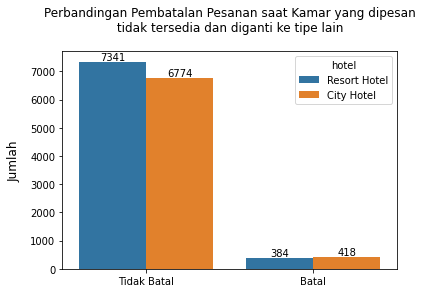

In [35]:
ax=sns.countplot(x='is_canceled', data=df[df['is_different_type']==1],hue='hotel')
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.xticks(np.arange(2),['Tidak Batal','Batal'])
# plt.yticks(np.arange(0,100000,5000))
plt.xlabel('')
plt.ylabel('Jumlah', size=12, labelpad=10)
plt.title('Perbandingan Pembatalan Pesanan saat Kamar yang dipesan\n tidak tersedia dan diganti ke tipe lain ',size=12, pad=20)
plt.show()

In [36]:
#2 Membuat crosstab perbandingan cancellation pesanan 'is_canceled' dengan pesanan yang jenis kamarnya berbeda dengan yang dipesan

(pd.crosstab(index=[df['hotel'], df['is_different_type'][df['is_different_type']==True]], columns=df['is_canceled'], normalize=True, margins=True) * 100).round(2)


,is_canceled,0,1,All
hotel,is_different_type,,,
City Hotel,1,45.41,2.80,48.21
Resort Hotel,1,49.21,2.57,51.79
All,,94.62,5.38,100.00


### Insight 8:
- 94.62% tamu yang kamarnya mengalami perubahan dari yang dipesan tidak membatalkan pesanannya. 
- Sedangkan hanya 5.38% tamu yang kamarnya mengalami perubahan dari yang dipesan membatalkan pesanannya 

### Business Question 9:

Bagaimana perbandingan pemesanan sebagai tamu baru dan pemesanan sebagai tamu berulang ?

In [37]:
#1 Tampilkan data jumlah pemesanan sebagai tamu baru dan pemesanan sebagai tamu berulang untuk kedua jenis hotel dari tahun 2015-2017
pd.crosstab(index=df['hotel'], columns=df['is_repeated_guest'], values=df['is_repeated_guest'], aggfunc=('count'), margins=True, margins_name='Jumlah')

is_repeated_guest,0,1,Jumlah
hotel,,,
City Hotel,77298,2032,79330
Resort Hotel,38282,1778,40060
Jumlah,115580,3810,119390


In [38]:
#1 Tampilkan data jumlah pemesanan sebagai tamu baru dan pemesanan sebagai tamu berulang untuk kedua jenis hotel dari tahun 2015-2017
(pd.crosstab(index=df['hotel'], columns=df['is_repeated_guest'], values=df['is_repeated_guest'], aggfunc=('count'), normalize=True, margins=True, margins_name='Jumlah')*100).round(2)

is_repeated_guest,0,1,Jumlah
hotel,,,
City Hotel,64.74,1.70,66.45
Resort Hotel,32.06,1.49,33.55
Jumlah,96.81,3.19,100.00


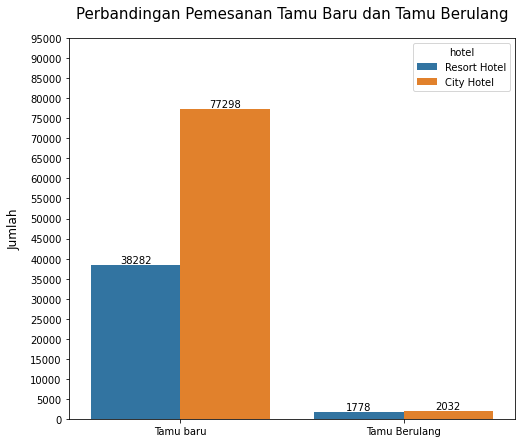

In [39]:
plt.figure(figsize=(8,7))
ax=sns.countplot(x='is_repeated_guest', hue='hotel', data=df)
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.xticks(np.arange(2),['Tamu baru','Tamu Berulang'])
plt.yticks(np.arange(0,100000,5000))
plt.xlabel('')
plt.ylabel('Jumlah', size=12, labelpad=10)
plt.title('Perbandingan Pemesanan Tamu Baru dan Tamu Berulang',size=15, pad=20)
plt.show()

### Insight 9:
- Pemesanan yang dilakukan oleh tamu baru jauh lebih banyak yaitu sebanyak 115.580 dibandingkan pemesanan oleh tamu berulang yaitu sebanyak 3.810.
- Pemesanan yang dilakukan oleh tamu baru pada City Hotel memiliki jumlah jauh lebih banyak yaitu sebesar 77.298 dibandingkan resort hotel sebanyak 38.282
- Jumlah pemesanan yang dilakukan oleh tamu berulang pada City Hotel tidak berbeda jauh dari Resort Hotel, dengan city hotel sebanyak 2.032 tamu berulang dan resort hotel sebanyak 1.778 tamu berulang
- Secara total pesanan jumlah tambu baru memiliki persentase jauh lebih besar yaitu 96.81% dibandingkan tamu berulang sebesar 3.19%

## Business Question 10
Bagaimana perbandingan jumlah pengunjung dewasa, anak-anak, dan bayi untuk city hotel dan resort hotel? 

In [40]:
#1 Tampilkan data perbandingan jumlah pengunjung dewasa, anak-anak, dan bayi untuk city hotel dan resort hotel
adult=pd.crosstab(index=df['hotel'], columns='Dewasa', values=df['adults'], aggfunc=('sum'))
children=pd.crosstab(index=df['hotel'], columns='Anak-Anak', values=df['children'], aggfunc=('sum')).astype('int64')
babies=pd.crosstab(index=df['hotel'], columns='Bayi', values=df['babies'], aggfunc=('sum'))
tamu=pd.concat((adult, children,babies), axis=1).T
pd.concat((adult, children,babies), axis=1)


col_0,Dewasa,Anak-Anak,Bayi
hotel,,,
City Hotel,146838,7248,392
Resort Hotel,74798,5155,557


<Figure size 576x504 with 0 Axes>

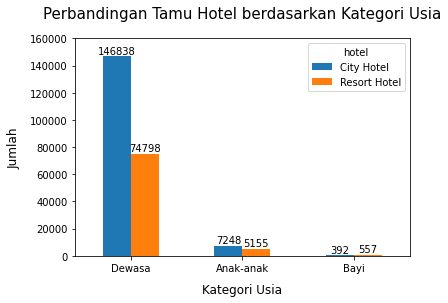

In [41]:
plt.figure(figsize=(8,7))
ax=tamu.plot(kind='bar')
for i in range(2):
    ax.bar_label(ax.containers[i], label_type='edge', padding=0.5)
plt.xticks(np.arange(3),['Dewasa','Anak-anak','Bayi'],rotation=0)
plt.yticks(np.arange(0,180_000,20_000))
plt.title('Perbandingan Tamu Hotel berdasarkan Kategori Usia', pad=20, size=15)
plt.xlabel('Kategori Usia', labelpad=10, size=12)
plt.ylabel('Jumlah', labelpad=10, size=12)

plt.show()

### Insight 10:
- Jumlah tamu dewasa pada city hotel adalah sebanyak 146.838, lebih banyak hampir dua kali lipat dari resort hotel yang memiliki jumlah sebanyak 74.798
- Jumlah tamu anak-anak pada city hotel adalah sebanyak 7.248, lebih banyak dari resort hotel yang memiliki jumlah sebanyak 5.155
- Jumlah tamu bayi pada city hotel adalah sebanyak 392, lebih sedikit dari resort hotel yang memiliki jumlah sebanyak 557



## Analisa:
- Business Question 1:
    - City Hotel yang bertempat di kota Lisbon, Portugal memiliki banyak potensi wisata sejarah dan budaya sehingga City Hotel memiliki banyak peminat ditambah dengan mudahnya wisatawan asing datang melalui bandara internasional. Resort Hotel berlokasi di Algarve daerah selatan negara Portugal yang memiliki pemandangan pantai dan suasana desa pesisir yang sepi serta kota pelabuhan yang memiliki nilai sejarah yang panjang.
    - Kedua hotel memiliki tren kenaikan dan penurunan pengunjung. Pada bulan Februari-Juni bertepatan dengan musim panas yang merupakan high season dan Juli-Oktober yang bertepatan dengan musim gugur dan festival kebudayaan di Portugal.

- Business Question 2-5:
    - Dari beberapa hasil analisis bivariate-multivariate yang telah dilakukan, pemesanan dengan 'No Deposit' selalu memiliki tingkat pembatalan paling tinggi. Terutama 'No Deposit' pada pemesanan City Hotel, dan 'No Deposit' pada pemesanan melalui Online Travel Agent.
    - Dengan analisa Chi-Squared, ditemukan bahwa variabel tipe deposit dan variabel pembatalan, adalah variabel yang saling berhubungan.

- Business Question 6-8:
    - Pembatalan pesanan saat terjadi perubahan jenis kamar akibat kamar yang dipesan tidak tersedia memiliki jumlah yang relatif lebih sedikit dibandingkan tamu yang tidak membatalkan pesanannya, yaitu sebesar 5.38%. Ini berarti sebagian besar tamu walaupun mendapat perubahan kamar dari yang telah dipesan, mereka tetap tidak membatalkan pesanannya.  
    - Dari perbandingan jumlah pemesanan tamu baru dan pemesanan tamu berulang, didapat bahwa jumlah pemesanan tamu baru persentasenya jauh lebih besar dibandingkan tamu berulang yang hanya sebesar 3.19%. Berdasarkan jurnal berjudul "Why Customers Don’t Revisit in Tourism and Hospitality Industry?" oleh Jing-Rong Chang, alasan tamu tidak melakukan pemesanan kembali dapat disebabkan karena aksesabilitas lokasi hotel yang kurang strategis, harga yang tidak sesuai dengan fasilitas, kebersihan hotel, dan review negatif di internet.
    - Data jumlah tamu hotel berdasarkan kategori usia menunjukkan bahwa tamu dewasa pada City Hotel memiliki jumlah hampir 2x lipat dari Resort Hotel. Meskipun jumlah tamu dewasa kedua hotel memiliki selisih yang signifikan, data jumlah tamu dengan kategori Anak-Anak dan Bayi memiliki selisih yang tidak jauh berbeda. City Hotel memiliki jumlah tamu dengan kategori usia Anak-Anak lebih banyak daripada Resort Hotel, namun Resort Hotel memiliki jumlah lebih banyak pada kategori usia bayi dibandingkan City Hotel. Ini artinya proporsi jumlah tamu yang membawa anak dan bayi di Resort Hotel lebih besar daripada City Hotel.

## Business Recommendations:
- Business Question 1-3:
    - Data durasi menginap yang telah diolah ternyata sesuai dengan jurnal 'Lisbon and Porto Hotel Market Research & Forecast Report' yang ditulis Joaquim Chambel yang menyatakan rata-rata pengunjung hotel menginap 1-3 hari. Tren peningkatan pengunjung dapat menjadi pandangan optimis dengan cara menambah suplai kamar dan meningkatkan kualitas hotel untuk mengakomodasi pertumbuhan pariwisata di Portugal.
    - Terdapat tren peningkatan pengunjung di bulan Februari-Juni bertepatan dengan musim panas di Portugal, yang mana menurut penelitian 'Season and Weather Effects on Travel-Related Mood and Travel Satisfaction' oleh Margareta Friman dkk musim panas menyebabkan perasaan yang lebih baik, berenergi positif dan cuaca cerah yang mendukung aktivitas luar ruangan. Berdasarkan penemuan ini, `Divisi Marketing` hotel dapat menyesuaikan cara pemasaran yang sesuai dengan musim panas. Menurut Nancy Huang, Senior Marketing Director dilansir dari artikelnya di pegasus.com, musim panas menjadi waktu terbaik untuk menawarkan paket menginap dan kegiatan luar ruangan seperti bekerja sama dengan tempat wisata yang ada di daerahnya. Selain promosi tersebut, bisa menggunakan sosial media untuk menunjukkan apa saja yang bisa dilakukan di libur musim panas.
    - Tren peningkatan pengunjung di bulan Juli-Oktober bertepatan dengan musim gugur di Portugal. Menurut tulisan Lamia Darwish berjudul 'Best Time To Visit Portugal', Portugal mengalami high-season di periode ini. Hal ini disebabkan oleh cuaca yang hangat, panen anggur, pantai-pantai lebih sepi dan festival kebudayaan yang diadakan tiap tahun. `Divisi Guest Relations` dapat membuat improvisasi sejalan dengan studi 'Outdoor Tourism in the North of Portugal from the Perspective of Tourist Entertainment Companies' yang menyatakan hotel dapat menawarkan kegiatan luar ruangan seperti rute wisata berjalan dan memanfaatkan cuaca yang tidak terlalu terik dan tetap cerah. 

- Business Question 4-6:
    - Berdasarkan studi yang dilakukan pada tahun 2019 oleh Fernández, Vall-Llosera, dan Moya yang berjudul "ANALYSIS OF OTA IMPACT ON HOTEL RESERVATIONS", ditemukan bahwa pemesanan hotel melalui Online Travel Agents (OTA) mencakup hingga 93,2% dari total pemesanan hotel. Hal ini selaras dengan data set yang kami gunakan, dimana pemesanan hotel paling besar berasal dari OTA (47%). Berdasarkan hal tersebut, `Divisi Marketing` dari hotel ini bisa memfokuskan promosi dan marketing melalui channel OTA agar dapat menjangkau pasar yang paling luas. Ditambah lagi, berdasarkan data dari PhocusWright (Perusahaan riset yang berfokus ke Travel industry) 60% dari traveler, akan mengunjungi OTA ketika melakukan riset untuk opsi ketika nanti berpergian. Dengan melakukan marketing melalui OTA, sebuah hotel akan bisa menjadi 'stand-out' ketika ditemukan oleh calon pengunjungnya di OTA. 
    
    - Tipe deposit 'No Deposit' selalu memiliki tingkat pembatalan pesanan paling tinggi. Sebaliknya, tipe deposit 'refundable' dan 'non-refundable' selalu memiliki tingkat pembatalan lebih rendah. Ditambah juga, setelah dilakukan chi-squared test antara variabel deposit types dan pembatalan pesanan, ditemukan bahwa kedua variabel tersebut saling berhubungan. Hal ini selaras dengan studi yang dilakukan oleh Chayanon Tongmungkorn (2021) dimana beliau menemukan bahwa tipe deposit merupakan salah satu variabel yang paling berpengaruh terhadap keputusan pelanggan untuk melakukan pembatalan pesanan. Berdasarkan studi dari Chen, Schwartz, dan Vargas (2011) Hotel bisa mengoptimisasi sistem revenue nya dengan memvariasikan kebijakan pembatalan pemesanan seperti penggunaan deposit, deadline pembatalan, dan pemberian penawaran yang menarik. Berdasarkan hal tersebut divisi `executive office` yang bertugas untuk mengatur segala operasional hotel, bisa mengimplementasikan pemberian discount jika seorang pelanggan melakukan pemesanan dengan tipe deposit 'refundable' dan memberi diskon + penawaran lain untuk pelanggan yang memilih tipe deposit 'non-refundable'. Selain itu, Hotel juga bisa memberikan deadline pembatalan yang ketat untuk pemesanan yang bertipe 'no deposit'.

- Business Question 7-9:
    - Untuk menarik tamu lama datang kembali, kebersihan hotel harus selalu diperhatikan, `Departemen Houeskeeper` dapat membuat jadwal pembersihan yang ketat dan laporan terkontrol untuk memastikan kebersihan hotel terjaga. Kemudian `Departemen Sales & Marketing` yang bertanggung jawab mengelola situs hotel harus dapat mengidentifikasi komentar negatif pelanggan di internet serta menanggapinya dengan cepat dan hati-hati. Lokasi yang kurang strategis juga dapat diantisipasi dengan menyediakan shuttle bus yang terkoneksi ke tempat wisata atau transportasi publik, hal ini dapat disiapkan oleh `Departemen Front Office`
    - Resort Hotel banyak dipilih oleh tamu yang memiliki anak-anak dan bayi. Menurut **Mags Huggins** yang telah bekerja di industri turisme lebih dari 20 tahun, hotel perlu menemukan cara untuk membedakan diri mereka sendiri untuk menarik tamu. Banyak hotel telah sukses melakukan pemasaran diri mereka sendiri dengan salah satu segmen yang tumbuh paling cepat adalah keluarga. Untuk menarik jumlah tamu yang datang, `Departemen House Keeper` sebagai pengelola public area hotel berkoordinasi dengan `Departemen Financial` dapat menambah fasilitas untuk tempat bermain anak-anak dan `Departemen Sales & Marketing` yang mengurus relasi publik dapat membuat acara eventual seperti cooking class untuk anak-anak dan magic show. Kemudian `Departemen Food & Beverage` yang mengelola hidangan hotel dapat membuat pilihan menu makan pagi yang menarik untuk anak-anak. `Departemen Sales & Marketing` yang bertanggung jawab mengelola situs hotel juga dapat menampilkan banyak gambar anak-anak bersenang-senang serta ulasan dari orang tua yang membawa anak-anak pada laman situs hotel. 